# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [42]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") # warnings 무시

In [43]:
from sklearn.datasets import make_classification # sample data 생성
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [44]:
# Sample data 를 이용해 Classification 을 진행해보자.
samples = 1000
x, y = make_classification(n_samples=samples, n_features=2,
                           n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                           n_redundant=0, # 노이즈 개수
                           n_clusters_per_class=1) # 클래스당 클러스터의 개수 예) class 0 는 1개의 cluster로 분리된다

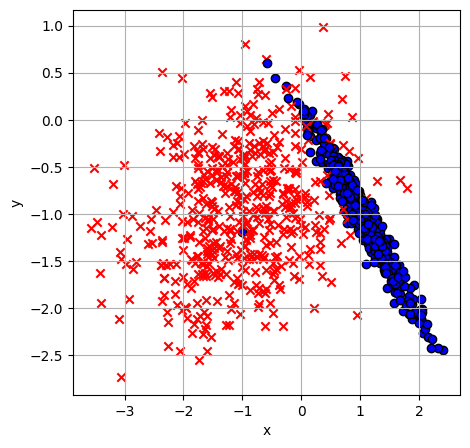

In [4]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0: # 정답이 0 인 class x 로 마킹
        ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
    else: # 나머지는 o 로 마킹
        ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.95125
Test Data Score : 0.96


In [8]:
# model 정확도 평가
scores = cross_val_score(model, x, y, cv = 10, scoring = 'accuracy')
print(f'CV mean score: {scores.mean()}')

CV mean score: 0.951


In [9]:
model.intercept_, model.coef_

(array([-0.22391522]), array([[4.06729116, 1.18762885]]))

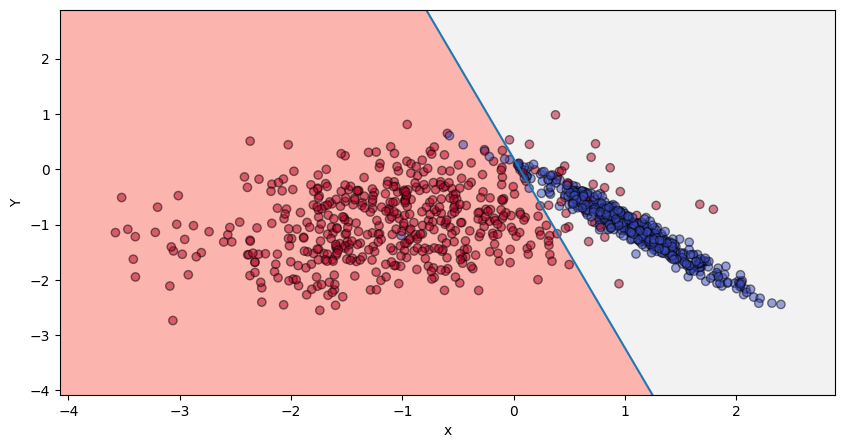

In [10]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 격자 데이터 생성
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel(): 다차원을 1차원으로 해체

# Test data를 이용한 분류
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# train data plot에 출력
plt.scatter(x[:, 0], x[:, 1], c=np.abs(y -1), edgecolors='k', alpha = .5, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

# 분류 직선
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
x_lin = np.linspace(x_min, x_max)
y_lin = -(w_1/w_2)*x_lin  - (w_0/w_2)
# 2차원에 분류 직선을 그려준다.

plt.plot(x_lin, y_lin)

plt.show()

## 붓꽃 데이터

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![image.png](attachment:image.png)

In [46]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [47]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
species = pd.Series((iris.target), dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [49]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# 데이터셋 분포 확인
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot
- Median: 데이터의 중앙값
- 1사 분위(Q1): Median 을 기준으로 하위 25% 지점
- 3사 분위(Q3): Median 을 기준으로 상위 25% 지점
- Interquartile range (IQR)(상자길이) : Q3 - Q1
- Lower and upper 1.5*IQR whiskers(수염)
- Outliers(이상점):  Q1 − 1.5 IQR 또는 Q3 + 1.5 IQR 밖에 위치하는 데이터


![image.png](https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png)

In [51]:
# https://medium.com/@Aaron__Kim/outlier-모두-제거해야할까-3aec52ef21b1

<Axes: >

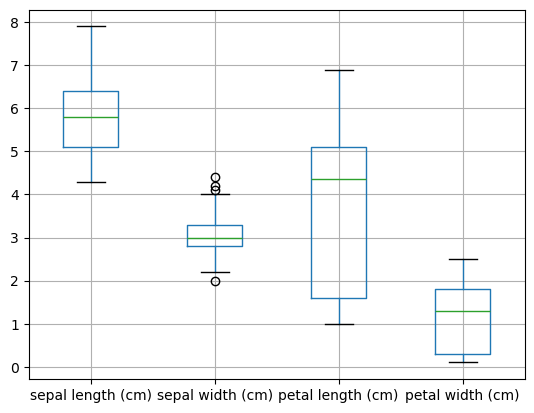

In [52]:
# 이상치가 크게 영향을 주지 않기 때문에 꼭 제거 하지 않아도 된다.
iris_df.boxplot()

<Axes: >

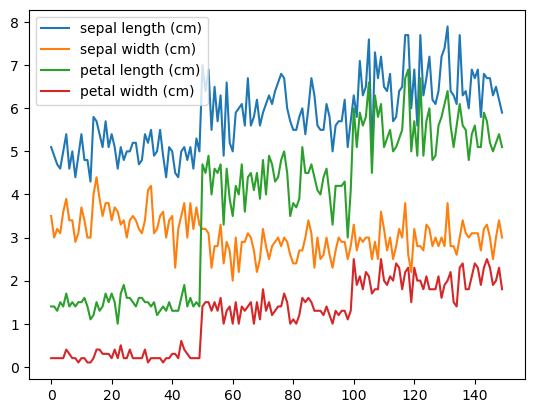

In [53]:
iris_df.plot()

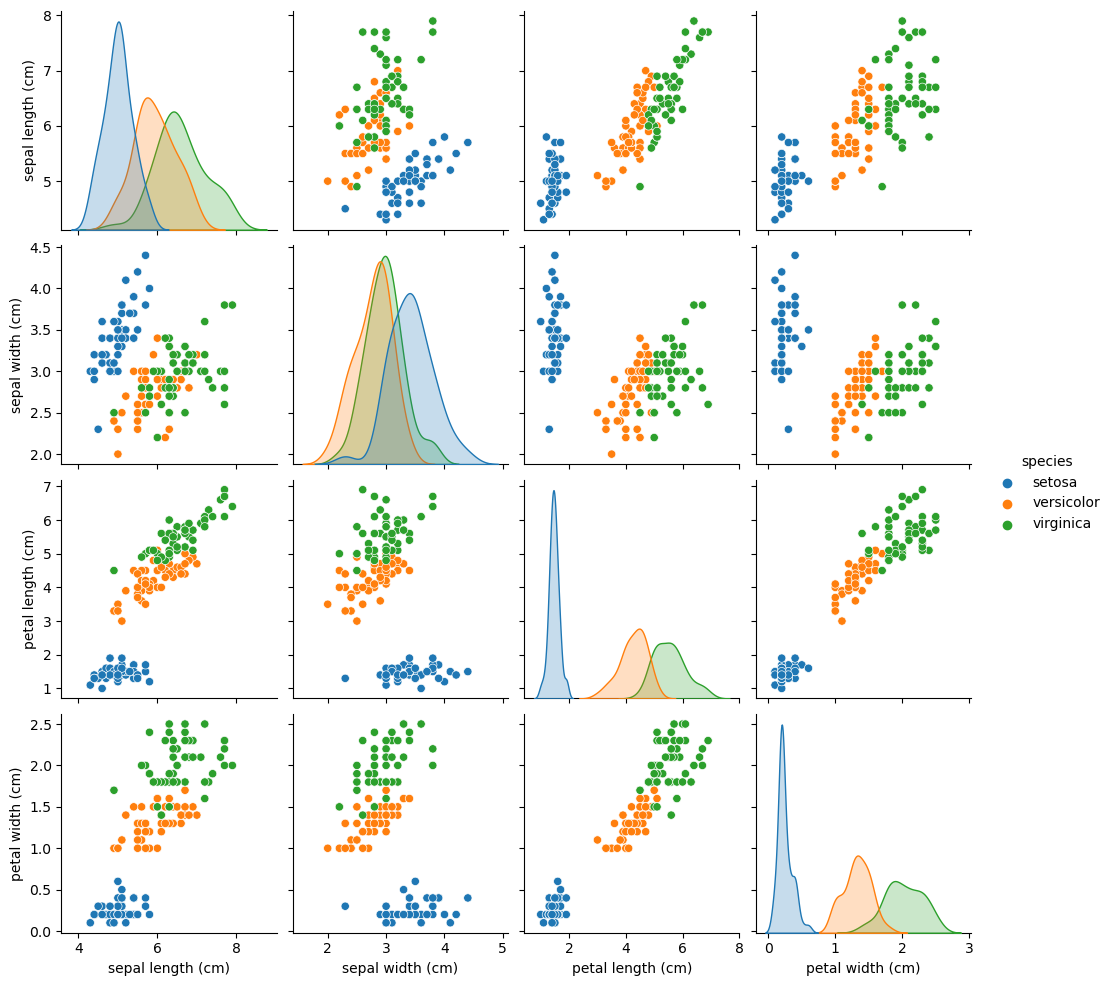

In [54]:
import seaborn as sns
sns.pairplot(iris_df, hue = "species")

## 붓꽃 데이터에 대한 로지스틱 회귀

In [55]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris.data[:, [2, 3]] # petal length (cm)	petal width (cm)를 이용해 종을 분류한다.

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [57]:
x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size= 0.2,
                random_state=1234)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
model.score(x_train, y_train)

0.9583333333333334

In [61]:
model.score(x_test, y_test)

1.0

In [62]:
y_test

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [63]:
import numpy as np
x = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

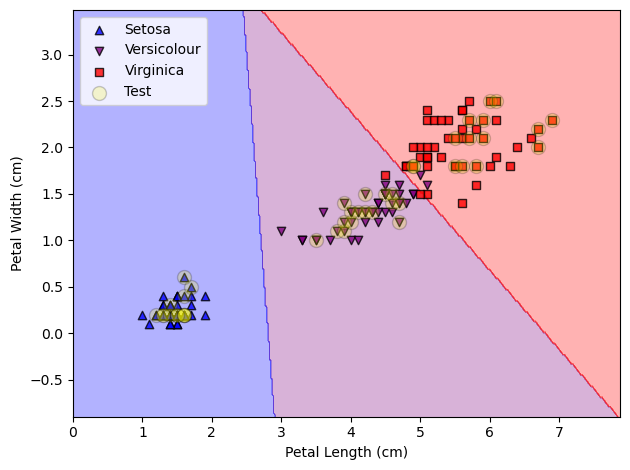

In [64]:
from matplotlib.colors import ListedColormap


# 격자를 이용한 분류 직선 표시
x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                       np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())


# 실제 train dataset
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
              alpha = 0.8, c=colors[idx],
              marker=markers[idx], label=species[cl],
              edgecolor='k')

# test Set
x_comb_test, y_comb_test = x[range(105, 150), :], y[range(105, 150)]
plt.scatter(x_comb_test[:, 0], x_comb_test[:, 1],
            c='yellow', edgecolor = 'k', alpha=0.2,
            linewidth=1, marker='o',
            s=100, label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

### C
- 규제의 역수값, 값이 클수록 규제가 약해지고, 값이 작을수록 규제가 강해진다.

### multi_class
- 다중 분류 문제를 처리하기 위해 지정하는 옵션
- auto : 자동으로 선택
- ovr(one vs rest) : 이진 분류 문제 해결
- multinomial : 다중 분류

### solver
- optimization에 사용되는 algorithm의 종류.
    - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} (default: 'lbfgs')
- 작은 dataset의 경우 'liblinear'이 좋은 선택일 수 있으며, 'sag'과 'saga'는 큰 dataset에서 더욱 빠르게 동작한다.
- Multiclass problem의 경우, 'newton-cg', 'sag', 'saga', 'lbfgs'만이 multinomial loss를 다룰 수 있다.
- 'liblinear'은 one-versus-rest scheme에서만 동작한다.
- 각 solver가 지원하는 penalty의 종류
    - 'newton-cg': 'l2', 'none'
    - 'lbfgs': 'l2', 'none'
    - 'liblinear': 'l1', 'l2'
    - 'sag': 'l2', 'none'
    - **'saga': 'elasticnet', 'l1', 'l2', 'none'**

In [76]:
model = LogisticRegression(solver="lbfgs",
                          penalty = "l2",
                          C=100,
                          multi_class = "auto",
                          random_state = 1)

In [77]:
model.fit(x_train, y_train)

LogisticRegression(C=100, random_state=1)

In [78]:
model.score(x_train, y_train)

0.95

In [79]:
model.score(x_test, y_test)

1.0

In [84]:
import multiprocessing
multiprocessing.cpu_count()/2

4.0

In [85]:
# multiprocessing 을 이용해서 GridSearchCV 로 최적의 hyperparameter 를 찾아보자.

from sklearn.model_selection import GridSearchCV
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2, 2.2, 2.4, 2.6, 2.8]}]

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = int(multiprocessing.cpu_count()/2))
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [2, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [86]:
result = gs.fit(iris.data, iris.target)

In [33]:
print(gs.best_estimator_)
print('Best Score: {}'.format(gs.best_score_))
print('Best Parameter: {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)
# {'C': 2.4, 'penalty': 'l2'} 일때가 가장 좋은 성능을 나타 낸다.

LogisticRegression(C=2.4)
Best Score: 0.9800000000000001
Best Parameter: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000594,0.000367,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.037439,0.008458,0.001515,0.000850,2,l2,"{'C': 2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000401,0.000038,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.037753,0.005957,0.001658,0.000663,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000426,0.000109,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.033708,0.003393,0.001039,0.000044,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000413,0.000042,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.034457,0.005640,0.001590,0.000631,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000404,0.000017,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.039060,0.007750,0.001643,0.000613,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [87]:
from sklearn.datasets import load_breast_cancer

In [88]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [89]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### 유방암 데이터에 대한 로지스틱 회귀

In [90]:
x_data = cancer_df.iloc[:, :-1]
y_data = cancer_df.iloc[:, -1]

In [91]:
# train data 와 test data 를 나누어 준다.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [92]:
x_train.shape

(426, 30)

In [93]:
x_test.shape

(143, 30)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# model 생성 및 학습
model_10 = LogisticRegression(max_iter=10)
model_10.fit(x_train, y_train)

LogisticRegression(max_iter=10)

In [96]:
model_10.score(x_test, y_test)

0.9440559440559441

In [97]:
model_10.score(x_train, y_train)

0.8943661971830986

In [99]:
# model 생성 및 학습
model_100 = LogisticRegression(max_iter=100)
model_100.fit(x_train, y_train)

LogisticRegression()

In [100]:
model_100.score(x_test, y_test)

0.9370629370629371

In [101]:
model_100.score(x_train, y_train)

0.9530516431924883

In [103]:
# model 생성 및 학습 
model_1000 = LogisticRegression(max_iter=1000)
model_1000.fit(x_train, y_train)
print(model_1000.score(x_test, y_test))
print(model_1000.score(x_train, y_train))

0.951048951048951
0.9647887323943662
